In [1]:
import PIL
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
import random
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf

#from tensorflow.python.framework import ops

from numpy import save
from numpy import load

In [2]:
DATADIR='G:\Desktop\cat dog'
CATEGORIES=['cat','dog']

IMG_SIZE=150

In [3]:
%%time
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

Wall time: 5min 15s


In [4]:
random.shuffle(training_data)

In [5]:
X_all=[]
y_all=[]
for categories, label in training_data:
    X_all.append(categories)
    y_all.append(label)

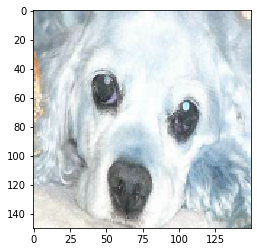

In [6]:
plt.imshow(X_all[15])
plt.show()

In [7]:
X = np.array(X_all).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [8]:
X.shape

(45091, 150, 150, 3)

In [9]:
X_train_flatten = X.reshape(X.shape[0], -1).T
X = X_train_flatten/255.

In [10]:
y = np.array([y_all])

In [11]:
X_train_flatten.shape

(67500, 45091)

In [12]:
X.shape, y.shape

((67500, 45091), (1, 45091))

In [28]:
y.dtype

dtype('int32')

In [29]:
X.dtype

dtype('float64')

In [30]:
X.nbytes

10821840000

In [31]:
y.nbytes

180364

In [13]:
X = X.astype('float16')

In [14]:
y = y.astype('int8')

In [15]:
X.nbytes

6087285000

In [16]:
y.nbytes

45091

In [17]:
save('G:/Desktop/cat dog/data150.npy', X)
save('G:/Desktop/cat dog/y150.npy', y)

In [2]:
X = load('G:/Desktop/cat dog/data50.npy')
y = load('G:/Desktop/cat dog/y50.npy')

In [3]:
X.shape

(30000, 45091)

In [4]:
X = X.T 
y = y.reshape(45091,1)

In [5]:
X.shape, y.shape

((45091, 30000), (45091, 1))

In [20]:
x_train = X[:36000]
y_train = y[:36000]
x_dev = X[36000:40500]
y_dev = y[36000:40500]
x_test = X[40500:]
y_test = y[40500:]

In [21]:
x_train.shape,y_train.shape,x_dev.shape,y_dev.shape,x_test.shape,y_test.shape

((36000, 30000),
 (36000, 1),
 (4500, 30000),
 (4500, 1),
 (4591, 30000),
 (4591, 1))

In [22]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras

In [44]:
%%time
bigger_model = Sequential()
bigger_model.add(Dense(300,activation='relu',kernel_initializer='glorot_uniform',
    bias_initializer='zeros', input_shape=(30000,)))
bigger_model.add(tf.keras.layers.BatchNormalization(trainable=True))
bigger_model.add(Dense(225,activation='relu',kernel_initializer='glorot_uniform',
    bias_initializer='zeros'))
bigger_model.add(tf.keras.layers.BatchNormalization(trainable=True))
bigger_model.add(Dense(70,activation='relu',kernel_initializer='glorot_uniform',
    bias_initializer='zeros'))
bigger_model.add(tf.keras.layers.BatchNormalization(trainable=True))
bigger_model.add(Dense(1,activation='sigmoid',kernel_initializer='glorot_uniform',
    bias_initializer='zeros'))

bigger_model.compile(optimizer=tf.keras.optimizers.Adam(0.0001),
              loss='binary_crossentropy', metrics=['accuracy'])

bigger_history = bigger_model.fit(x_train, y_train, epochs=69, batch_size=512,validation_data = (x_dev, y_dev))

Train on 36000 samples, validate on 4500 samples
Epoch 1/69
36000/36000 [==============================] - 4s 102us/sample - loss: 0.6565 - accuracy: 0.6319 - val_loss: 0.6774 - val_accuracy: 0.5940
Epoch 2/69
36000/36000 [==============================] - 3s 73us/sample - loss: 0.5671 - accuracy: 0.7071 - val_loss: 0.7267 - val_accuracy: 0.5553
Epoch 3/69
36000/36000 [==============================] - 3s 72us/sample - loss: 0.5189 - accuracy: 0.7457 - val_loss: 0.6330 - val_accuracy: 0.6376
Epoch 4/69
36000/36000 [==============================] - 3s 73us/sample - loss: 0.4635 - accuracy: 0.7878 - val_loss: 0.6239 - val_accuracy: 0.6629
Epoch 5/69
36000/36000 [==============================] - 3s 74us/sample - loss: 0.4158 - accuracy: 0.8206 - val_loss: 0.6099 - val_accuracy: 0.6742
Epoch 6/69
36000/36000 [==============================] - 3s 72us/sample - loss: 0.3628 - accuracy: 0.8550 - val_loss: 0.5818 - val_accuracy: 0.7013
Epoch 7/69
36000/36000 [==============================] 

In [45]:
bigger_model.evaluate(x_dev, y_dev)

4500/4500 [==============================] - 1s 134us/sample - loss: 0.7398 - accuracy: 0.8120


[0.739838152302636, 0.812]

In [36]:
bigger_model.evaluate(x_dev, y_dev)

4500/4500 [==============================] - 1s 127us/sample - loss: 1.0376 - accuracy: 0.8109


[1.0375512187745837, 0.8108889]

In [43]:
bigger_model.evaluate(x_test, y_test)

4591/4591 [==============================] - 1s 118us/sample - loss: 1.0324 - accuracy: 0.8118


[1.0324092181855895, 0.8118057]

In [24]:
bigger_model.evaluate(x_dev, y_dev)

4500/4500 [==============================] - 1s 145us/sample - loss: 0.9060 - accuracy: 0.8051


[0.9060323311487833, 0.8051111]

In [29]:
bigger_model.evaluate(x_dev, y_dev)

3545/3545 [==============================] - 0s 132us/sample - loss: 1.0377 - accuracy: 0.8240


[1.0376503232672116, 0.8239774]

In [50]:
%%time
baseline_model = Sequential()
baseline_model.add(Dense(100,activation='relu',kernel_initializer='glorot_uniform',
    bias_initializer='zeros', input_shape=(30000,)))
baseline_model.add(tf.keras.layers.BatchNormalization())
baseline_model.add(Dense(50,activation='relu',kernel_initializer='glorot_uniform',
    bias_initializer='zeros'))
baseline_model.add(tf.keras.layers.BatchNormalization())
baseline_model.add(Dense(30,activation='relu',kernel_initializer='glorot_uniform',
    bias_initializer='zeros'))
baseline_model.add(tf.keras.layers.BatchNormalization())
baseline_model.add(Dense(1,activation='sigmoid',kernel_initializer='glorot_uniform',
    bias_initializer='zeros'))

baseline_model.compile(optimizer=tf.keras.optimizers.Adam(0.0001),
              loss='binary_crossentropy', metrics=['accuracy'])

baseline_history = baseline_model.fit(x_train, y_train, epochs=200, batch_size=64,validation_data = (x_dev, y_dev))

Train on 36000 samples, validate on 4500 samples
Epoch 1/200
36000/36000 [==============================] - 6s 168us/sample - loss: 0.6559 - accuracy: 0.6222 - val_loss: 0.6485 - val_accuracy: 0.6271
Epoch 2/200
36000/36000 [==============================] - 5s 142us/sample - loss: 0.6005 - accuracy: 0.6732 - val_loss: 0.6861 - val_accuracy: 0.6253
Epoch 3/200
36000/36000 [==============================] - 5s 143us/sample - loss: 0.5757 - accuracy: 0.6955 - val_loss: 0.6410 - val_accuracy: 0.6502
Epoch 4/200
36000/36000 [==============================] - 5s 138us/sample - loss: 0.5488 - accuracy: 0.7193 - val_loss: 0.6892 - val_accuracy: 0.6369
Epoch 5/200
36000/36000 [==============================] - 5s 142us/sample - loss: 0.5246 - accuracy: 0.7375 - val_loss: 0.6901 - val_accuracy: 0.6147
Epoch 6/200
36000/36000 [==============================] - 5s 138us/sample - loss: 0.4982 - accuracy: 0.7594 - val_loss: 0.6521 - val_accuracy: 0.6398
Epoch 7/200
36000/36000 [====================

36000/36000 [==============================] - 13s 361us/sample - loss: 0.0309 - accuracy: 0.9892 - val_loss: 1.2183 - val_accuracy: 0.7531
Epoch 108/200
36000/36000 [==============================] - 12s 329us/sample - loss: 0.0275 - accuracy: 0.9902 - val_loss: 1.1832 - val_accuracy: 0.7758
Epoch 109/200
36000/36000 [==============================] - 13s 352us/sample - loss: 0.0302 - accuracy: 0.9900 - val_loss: 1.1184 - val_accuracy: 0.7711
Epoch 110/200
36000/36000 [==============================] - 12s 337us/sample - loss: 0.0352 - accuracy: 0.9874 - val_loss: 1.4885 - val_accuracy: 0.7351
Epoch 111/200
36000/36000 [==============================] - 12s 340us/sample - loss: 0.0318 - accuracy: 0.9885 - val_loss: 1.6222 - val_accuracy: 0.7227
Epoch 112/200
36000/36000 [==============================] - 12s 336us/sample - loss: 0.0313 - accuracy: 0.9891 - val_loss: 1.1589 - val_accuracy: 0.7660
Epoch 113/200
36000/36000 [==============================] - 13s 364us/sample - loss: 0.03

In [52]:
baseline_model.evaluate(x_dev, y_dev)

4500/4500 [==============================] - 1s 217us/sample - loss: 1.3575 - accuracy: 0.7856


[1.357536943435669, 0.78555554]

In [53]:
a.append(('model4', baseline_history))

In [27]:
def plot_history(histories, key='accuracy'):
    plt.figure(figsize=(16,10))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                               '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                         label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])

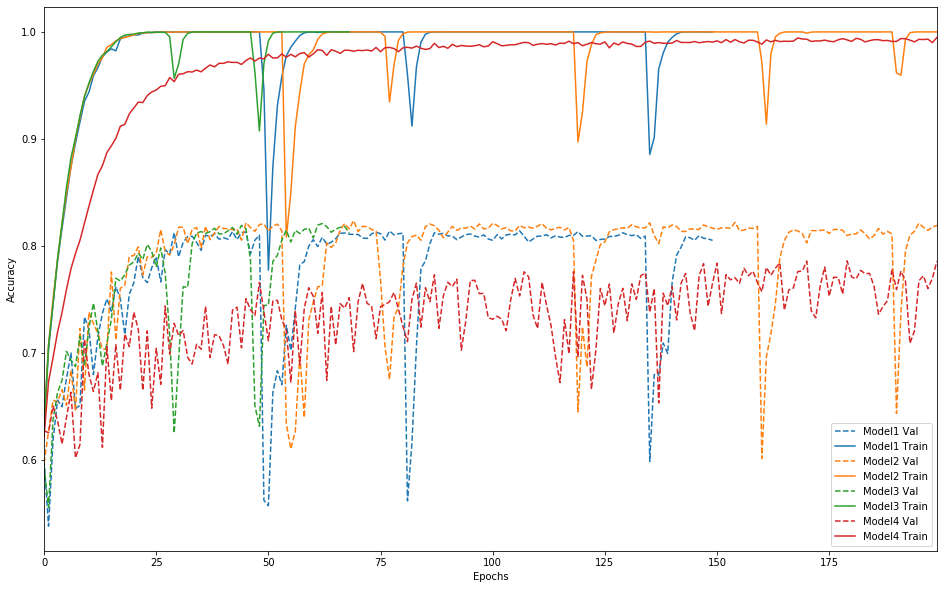

In [54]:
plot_history(a)

In [25]:
a = []

In [34]:
max(bigger_history.history['val_accuracy'])

0.814

In [39]:
max(bigger_history.history['val_accuracy'])

0.8235555

In [41]:
j = 0
for i in bigger_history.history['val_accuracy']:
    if i == max(bigger_history.history['val_accuracy']):
        print(j)
    j += 1

69


In [42]:
bigger_history.history['val_accuracy'][69]

0.8235555

In [ ]:
plt.figure(figsize=(16,10))
val = plt.plot(bigger_history.epoch, bigger_history.history['val_accuracy'],
                               '--', label=name.title()+' Val')
plt.plot(bigger_history.epoch, bigger_history.history['accuracy'], color=val[0].get_color(),
                         label=name.title()+' Train')
plt.xlabel('Epochs')